In [1]:
import pandas as pd
pd.options.display.max_columns=200
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import plotly.express as px

In [2]:
data = pd.read_csv('data_RFM.csv')

In [3]:
data.head()

,Unnamed: 0,customer_unique_id,frequency,recency,amount_spent
0,0,7c396fd4830fd04220f754e42b4e5bff,2,335,65.38
1,3,af07308b275d755c9edb36a90c618231,1,40,118.70
2,4,3a653a41f6f9fc3d2a113cf8398680e8,1,26,159.90
3,5,7c142cf63193a1473d2e66489a9ae977,1,288,45.00
4,6,72632f0f9dd73dfee390c9b22eb56dd6,1,201,19.90


In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.set_index('customer_unique_id', inplace=True)

In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [7]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)

In [8]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 15)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(data_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

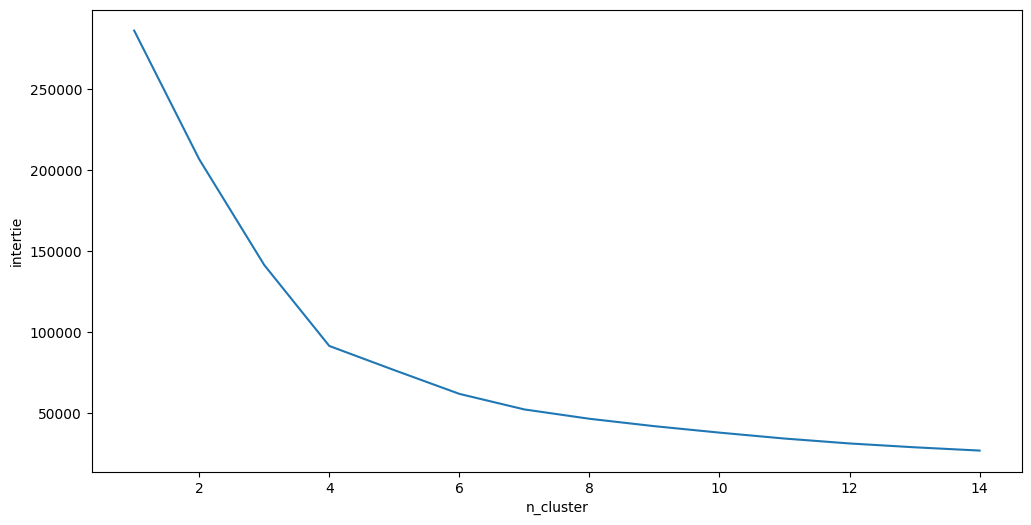

In [9]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertie")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [10]:
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=42)

In [11]:
data_cluster = pd.DataFrame(data={'cluster': kmeans.labels_}, index=data.index)
data = data.merge(data_cluster, left_index=True, right_index=True)

In [12]:
data.head()

,frequency,recency,amount_spent,cluster
customer_unique_id,,,,
7c396fd4830fd04220f754e42b4e5bff,2,335,65.38,1
af07308b275d755c9edb36a90c618231,1,40,118.70,0
3a653a41f6f9fc3d2a113cf8398680e8,1,26,159.90,0
7c142cf63193a1473d2e66489a9ae977,1,288,45.00,2
72632f0f9dd73dfee390c9b22eb56dd6,1,201,19.90,0


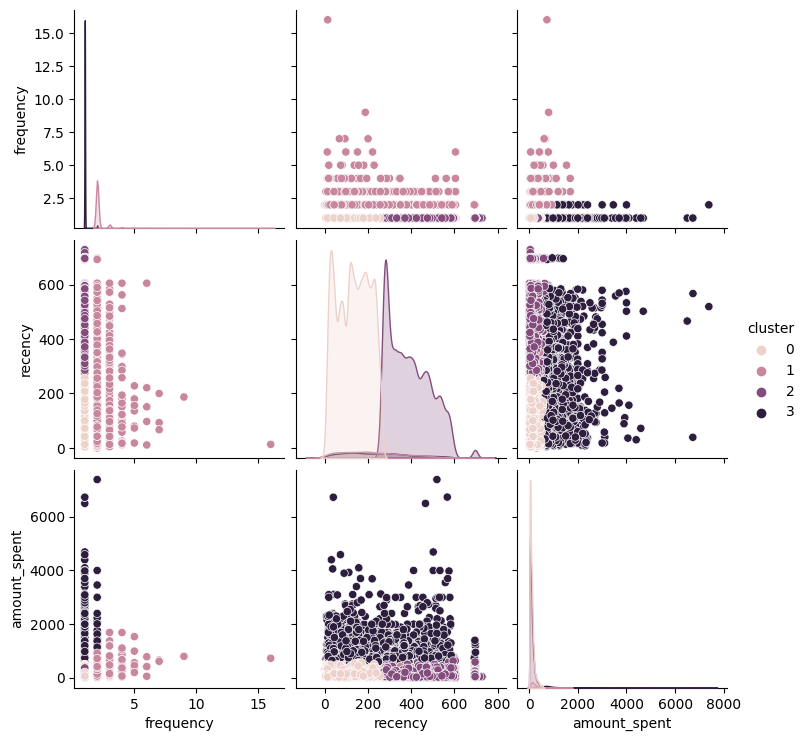

In [13]:
sns.pairplot(data, hue="cluster")

In [14]:
data_cluster_0 = data.loc[data['cluster']==0]
data_cluster_1 = data.loc[data['cluster']==1]
data_cluster_2 = data.loc[data['cluster']==2]
data_cluster_3 = data.loc[data['cluster']==3]

In [15]:
data.describe()

,frequency,recency,amount_spent,cluster
count,95420.000000,95420.000000,95420.000000,95420.000000
mean,1.034018,242.600377,130.249385,0.911329
std,0.211234,153.160320,197.308267,1.020343
min,1.000000,0.000000,0.850000,0.000000
25%,1.000000,118.000000,43.890000,0.000000
50%,1.000000,223.000000,79.900000,0.000000
75%,1.000000,352.000000,144.990000,2.000000
max,16.000000,728.000000,7388.000000,3.000000


In [16]:
data_cluster_0.describe()

,frequency,recency,amount_spent,cluster
count,51758.0,51758.000000,51758.000000,51758.0
mean,1.0,132.432281,102.731771,0.0
std,0.0,72.546436,89.640600,0.0
min,1.0,4.000000,0.850000,0.0
25%,1.0,69.000000,40.000000,0.0
50%,1.0,134.000000,78.000000,0.0
75%,1.0,194.000000,132.977500,0.0
max,1.0,262.000000,590.000000,0.0


In [17]:
data_cluster_1.describe()

,frequency,recency,amount_spent,cluster
count,2883.000000,2883.000000,2883.000000,2883.0
mean,2.115505,225.157128,210.677853,1.0
std,0.510316,144.574762,172.162756,0.0
min,2.000000,0.000000,11.980000,1.0
25%,2.000000,109.000000,99.800000,1.0
50%,2.000000,204.000000,160.990000,1.0
75%,2.000000,324.000000,267.300000,1.0
max,16.000000,696.000000,1690.920000,1.0


In [18]:
data_cluster_2.describe()

,frequency,recency,amount_spent,cluster
count,38261.0,38261.000000,38261.000000,38261.0
mean,1.0,392.735736,103.055808,2.0
std,0.0,96.477340,91.462009,0.0
min,1.0,263.000000,1.200000,2.0
25%,1.0,304.000000,40.000000,2.0
50%,1.0,380.000000,75.000000,2.0
75%,1.0,467.000000,129.990000,2.0
max,1.0,728.000000,649.170000,2.0


In [19]:
data_cluster_3.describe()

,frequency,recency,amount_spent,cluster
count,2518.000000,2518.000000,2518.000000,2518.0
mean,1.011914,245.793487,1016.998721,3.0
std,0.108522,151.898188,573.291592,0.0
min,1.000000,5.000000,548.000000,3.0
25%,1.000000,120.000000,665.920000,3.0
50%,1.000000,232.000000,818.950000,3.0
75%,1.000000,352.000000,1190.000000,3.0
max,2.000000,698.000000,7388.000000,3.0


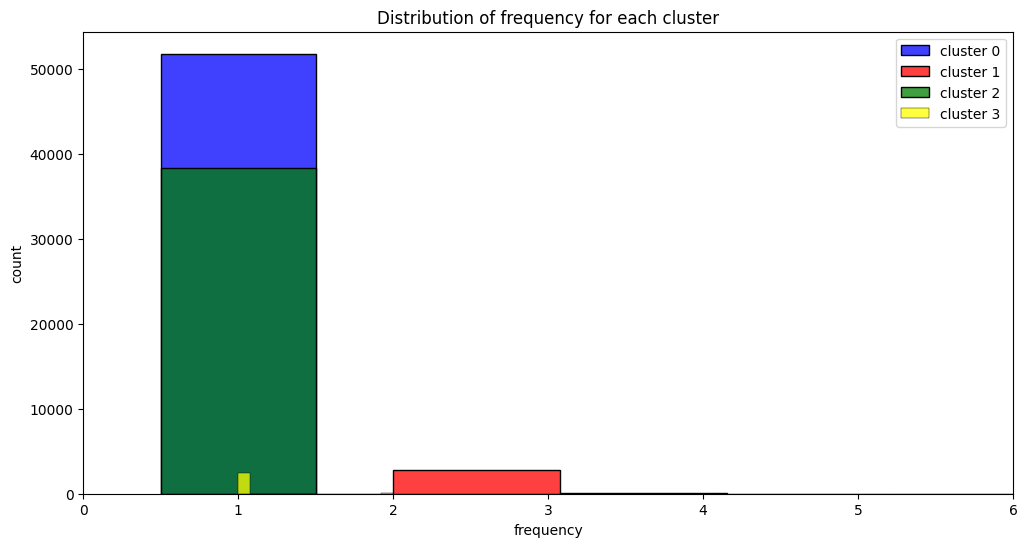

In [20]:
# Plot the distribution of frequency for each cluster
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.histplot(data_cluster_0['frequency'], ax=ax, color='blue', label='cluster 0')
sns.histplot(data_cluster_1['frequency'], ax=ax, color='red', label='cluster 1')
sns.histplot(data_cluster_2['frequency'], ax=ax, color='green', label='cluster 2')
sns.histplot(data_cluster_3['frequency'], ax=ax, color='yellow', label='cluster 3')
ax.set_title('Distribution of frequency for each cluster')
ax.set_xlabel('frequency')
ax.set_ylabel('count')
ax.set_xlim(0, 6)
ax.legend()

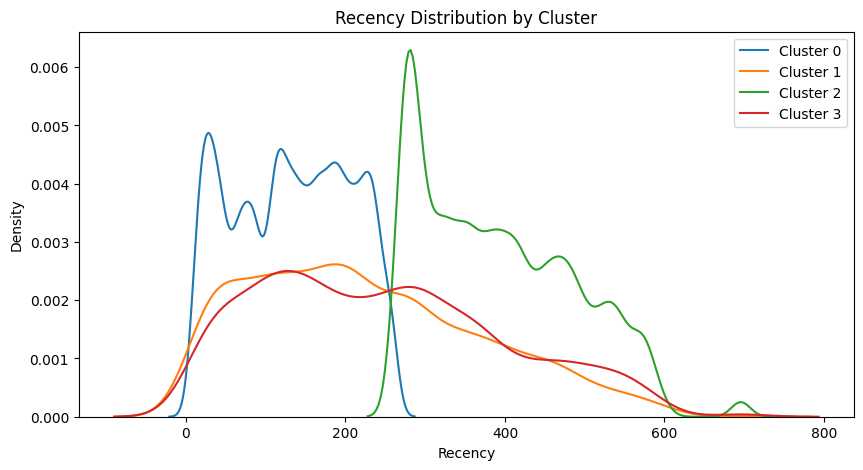

In [21]:
# Plot the distribution of recency for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_cluster_0['recency'], label='Cluster 0', legend=True)
sns.kdeplot(data_cluster_1['recency'], label='Cluster 1', legend=True)
sns.kdeplot(data_cluster_2['recency'], label='Cluster 2', legend=True)
sns.kdeplot(data_cluster_3['recency'], label='Cluster 3', legend=True)
plt.title('Recency Distribution by Cluster')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.legend()
plt.show()

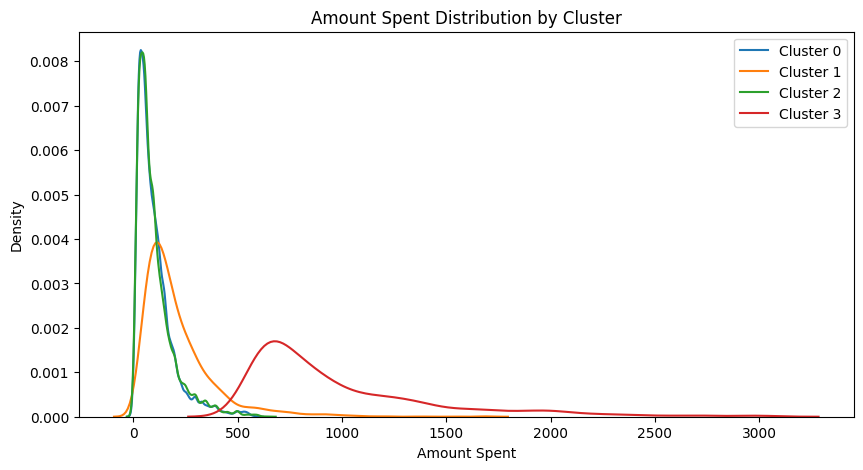

In [22]:
# Plot the distribution of amount spent under 3000 for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_cluster_0.loc[data_cluster_0['amount_spent']<3000]['amount_spent'], label='Cluster 0', legend=True)
sns.kdeplot(data_cluster_1.loc[data_cluster_1['amount_spent']<3000]['amount_spent'], label='Cluster 1', legend=True)
sns.kdeplot(data_cluster_2.loc[data_cluster_2['amount_spent']<3000]['amount_spent'], label='Cluster 2', legend=True)
sns.kdeplot(data_cluster_3.loc[data_cluster_3['amount_spent']<3000]['amount_spent'], label='Cluster 3', legend=True)
plt.title('Amount Spent Distribution by Cluster')
plt.xlabel('Amount Spent')
plt.ylabel('Density')
plt.legend()
plt.show()

In [23]:
data_scaled = data_scaled.merge(data_cluster, left_index=True, right_index=True)

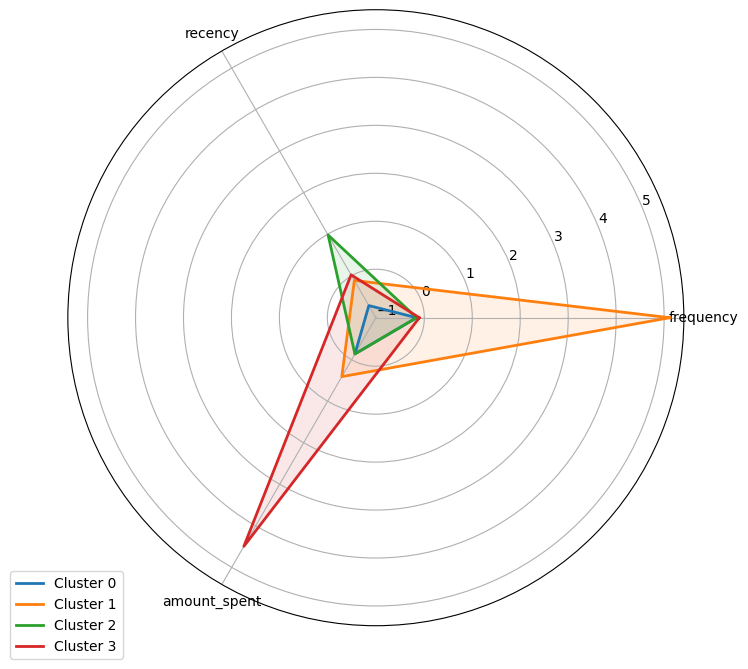

In [24]:
#Radar chart

cluster_names = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]
variables = ["frequency", "recency", "amount_spent"]
data_values = []
data_scaled.merge(data_cluster, left_index=True, right_index=True)

# Récupération des données pour chaque variable et chaque cluster
for cluster in range(4):
    values = []
    for variable in variables:
        values.append(data_scaled[data_scaled["cluster"] == cluster][variable].mean())
    data_values.append(values)

# Ajout de la première variable à la fin de la liste pour fermer le polygone
for i in range(4):
    data_values[i].append(data_values[i][0])

# Calcul de l'angle pour chaque variable
angles = [n / float(len(variables)) * 2 * np.pi for n in range(len(variables))]
angles.append(angles[0])

# Initialisation du plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Création du polygone pour chaque cluster
for i in range(4):
    values = data_values[i]
    ax.plot(angles, values, linewidth=2, label=cluster_names[i])
    ax.fill(angles, values, alpha=0.1)

# Ajout des labels pour chaque variable
plt.xticks(angles[:-1], variables)

# Ajout de la légende
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Affichage du radar chart
plt.show()

In [25]:
'''#Silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(data_scaled, kmeans.labels_)'''

'#Silhouette score\nfrom sklearn.metrics import silhouette_score\nsilhouette_score(data_scaled, kmeans.labels_)'

In [26]:
silhouette_score_kmean = 0.676781943192322

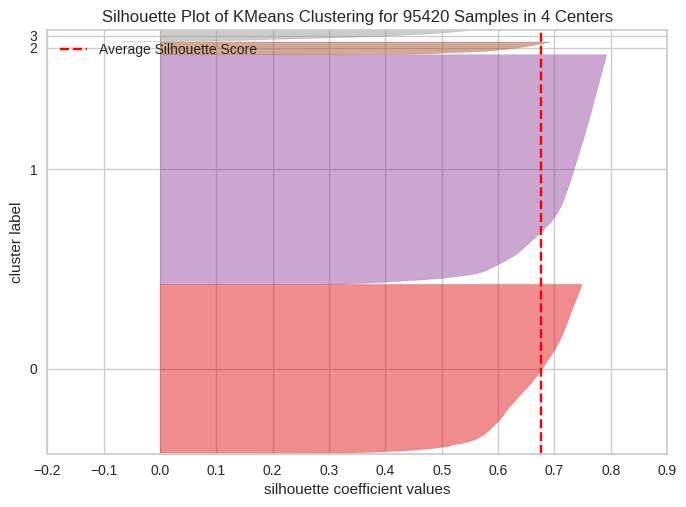

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 95420 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
#import silhouette visualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer 
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(data_scaled)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

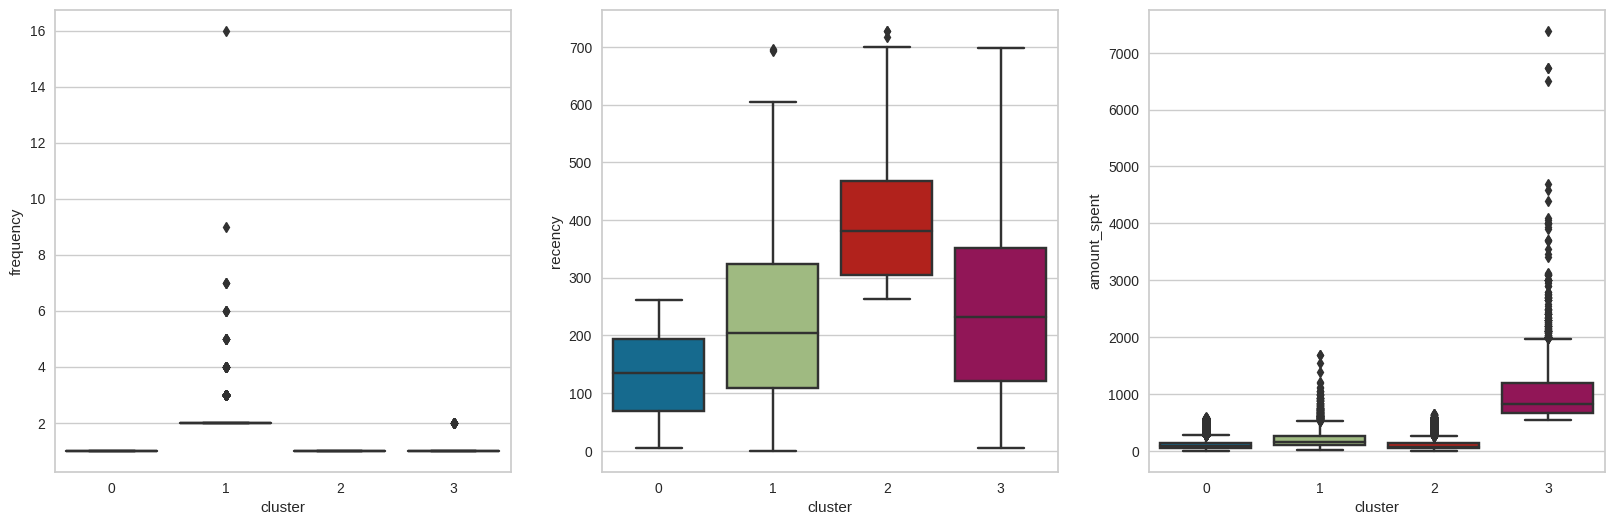

In [28]:
#boxplots for each cluster
fig, ax = plt.subplots(1,3,figsize=(20,6))
sns.boxplot(x='cluster', y='frequency', data=data, ax=ax[0])
sns.boxplot(x='cluster', y='recency', data=data, ax=ax[1])
sns.boxplot(x='cluster', y='amount_spent', data=data, ax=ax[2])
plt.show()

In [29]:
data_scaled.drop(columns=['cluster'], inplace=True)

In [30]:
#dbscan clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_scaled)

data_cluster = pd.DataFrame(data={'cluster': dbscan.labels_}, index=data.index)
data_cluster['cluster'].value_counts()

 1     92136
 0      2633
 3       278
 2       171
-1       131
 6        13
 7        12
 4         9
 5         7
 10        6
 8         6
 9         6
 12        6
 11        6
Name: cluster, dtype: int64

In [31]:
data = data.merge(data_cluster, left_index=True, right_index=True)

In [32]:
'''silhouette_score(data_scaled, dbscan.labels_)'''

'silhouette_score(data_scaled, dbscan.labels_)'

In [33]:
silhouette_score_dbscan = 0.4532058543351051

In [34]:
eps = np.linspace(0.01, 1, num=10)
min_samples = np.arange(2, 11, step = 3)

import itertools

combinations = list(itertools.product(eps, min_samples))

N = len(combinations)

In [39]:
def gridsearch_dbscan(X, combinations, min_cluster_eff):
      scores = []
      all_labels = []

      for i, (eps, num_samples) in enumerate(combinations):
            dbscan = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
            labels = dbscan.labels_
            labels_set = set(labels)
            num_clusters = len(labels_set) - (1 if -1 in labels_set else 0)

            if (num_clusters < 2) or (num_clusters > 8):
                  scores.append(-10)
                  all_labels.append('bad')
                  c = (eps, num_samples)
                  '''print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")'''
                  continue

            if silhouette_score(X, labels) < 0:
                  scores.append(-10)
                  all_labels.append('bad')
                  continue

            if (len(labels[labels == -1]) / len(labels)) < min_cluster_eff:
                  scores.append(-10)
                  all_labels.append('bad')
                  continue

            scores.append(silhouette_score(X, labels))
            all_labels.append(labels)
            print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels[-1]}, NumClusters: {num_clusters}")

            best_index = np.argmax(scores)
            best_parameters = combinations[best_index]
            best_labels = all_labels[best_index]
            best_score = scores[best_index]

      return {'best_epsilon': best_parameters[0],
      'best_min_samples': best_parameters[1], 
      'best_labels': best_labels,
      'best_score': best_score}

gridsearch_dbscan(data_scaled, combinations, 500)

KeyboardInterrupt: 

In [37]:
"""def get_scores_and_labels(combinations, X):
      scores = []
      all_labels = []

      for i, (eps, num_samples) in enumerate(combinations):
            dbscan = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
            labels = dbscan.labels_
            labels_set = set(labels)
            num_clusters = len(labels_set) - (1 if -1 in labels_set else 0)

            if (num_clusters < 2) or (num_clusters > 8):
                  scores.append(-10)
                  all_labels.append('bad')
                  c = (eps, num_samples)
                  '''print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")'''
                  continue

            if silhouette_score(X, labels) < 0:
                  scores.append(-10)
                  all_labels.append('bad')
                  continue


            scores.append(silhouette_score(X, labels))
            all_labels.append(labels)
            print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels[-1]}, NumClusters: {num_clusters}")

            best_index = np.argmax(scores)
            best_parameters = combinations[best_index]
            best_labels = all_labels[best_index]
            best_score = scores[best_index]

      return {'best_epsilon': best_parameters[0],
      'best_min_samples': best_parameters[1], 
      'best_labels': best_labels,
      'best_score': best_score}

best_dict = get_scores_and_labels(combinations, data_scaled)"""

'def get_scores_and_labels(combinations, X):\n      scores = []\n      all_labels = []\n\n      for i, (eps, num_samples) in enumerate(combinations):\n            dbscan = DBSCAN(eps=eps, min_samples=num_samples).fit(X)\n            labels = dbscan.labels_\n            labels_set = set(labels)\n            num_clusters = len(labels_set) - (1 if -1 in labels_set else 0)\n\n            if (num_clusters < 2) or (num_clusters > 8):\n                  scores.append(-10)\n                  all_labels.append(\'bad\')\n                  c = (eps, num_samples)\n                  \'\'\'print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")\'\'\'\n                  continue\n\n            if silhouette_score(X, labels) < 0:\n                  scores.append(-10)\n                  all_labels.append(\'bad\')\n                  continue\n\n\n            scores.append(silhouette_score(X, labels))\n            all_labels.append(labels)\n            print(f"Index: {i

In [ ]:
dbscan = DBSCAN(eps=best_dict['best_epsilon'], min_samples=best_dict['best_min_samples'])
dbscan.fit(data_scaled)

data_cluster = pd.DataFrame(data={'cluster': dbscan.labels_}, index=data.index)
data_cluster['cluster'].value_counts()

In [57]:
df = data.drop(data.loc[data['frequency']==1].index)

In [58]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [59]:
#hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering()
hierarchical.fit(df_scaled)

data_cluster = pd.DataFrame(data={'cluster': hierarchical.labels_}, index=df.index)
data_cluster['cluster'].value_counts()

1    2669
0     244
Name: cluster, dtype: int64

In [60]:
df_cluster_0 = df.loc[data_cluster['cluster']==0]
df_cluster_1 = df.loc[data_cluster['cluster']==1]

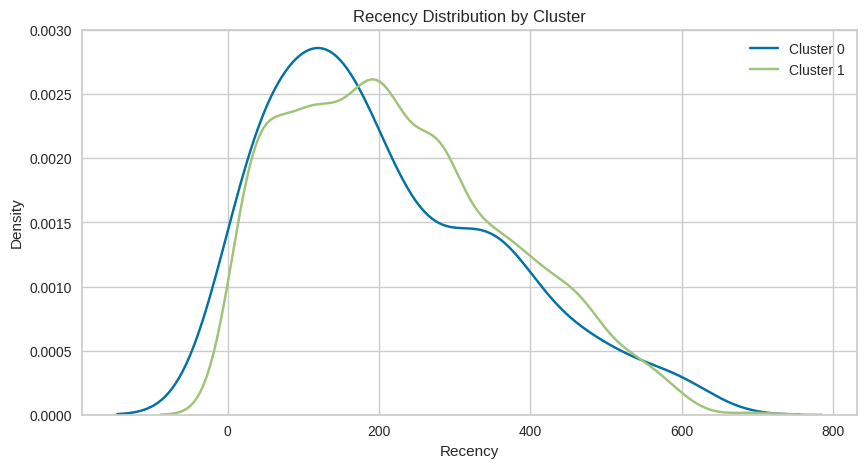

In [61]:
# Plot the distribution of recency for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(df_cluster_0['recency'], label='Cluster 0', legend=True)
sns.kdeplot(df_cluster_1['recency'], label='Cluster 1', legend=True)
plt.title('Recency Distribution by Cluster')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.legend()
plt.show()

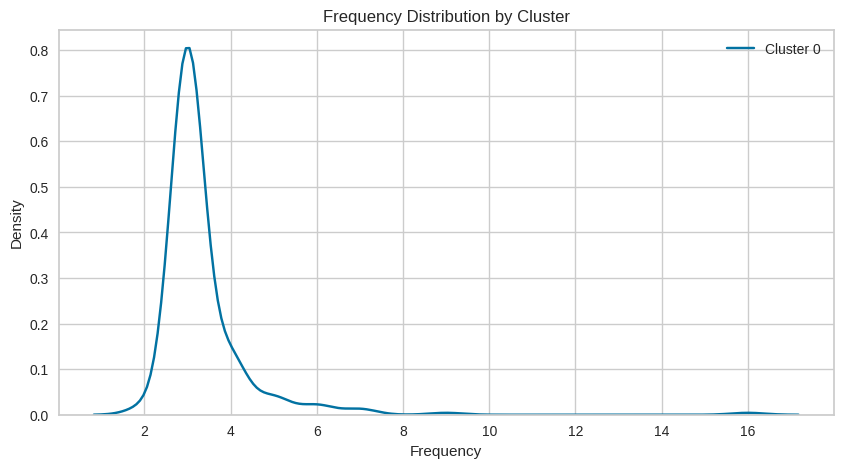

In [62]:
#Plot the distribution of frequency for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(df_cluster_0['frequency'], label='Cluster 0', legend=True)
sns.kdeplot(df_cluster_1['frequency'], label='Cluster 1', legend=True)
plt.title('Frequency Distribution by Cluster')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.legend()
plt.show()

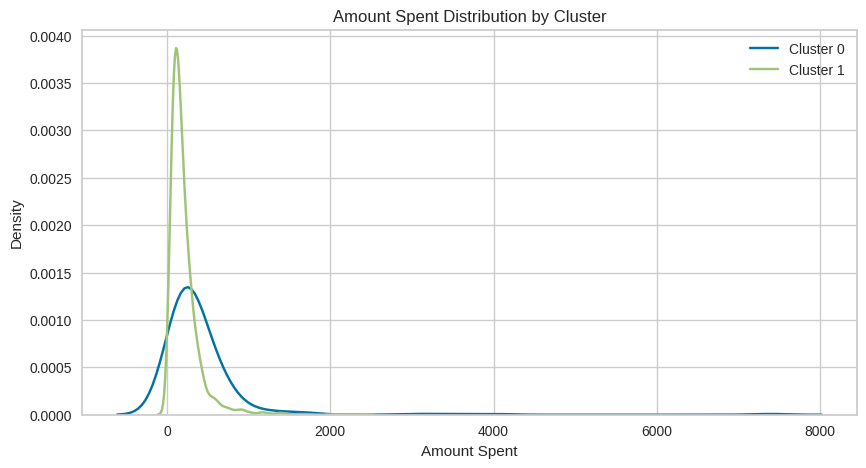

In [63]:
#Plot the distribution of amoount_spent for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(df_cluster_0['amount_spent'], label='Cluster 0', legend=True)
sns.kdeplot(df_cluster_1['amount_spent'], label='Cluster 1', legend=True)
plt.title('Amount Spent Distribution by Cluster')
plt.xlabel('Amount Spent')
plt.ylabel('Density')
plt.legend()
plt.show()

In [64]:
#Silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df_scaled, hierarchical.labels_)

0.7427385465135972

In [ ]:
data_2 = pd.read_csv('data_2.csv', index_col=0)

In [ ]:
data_2.head()

In [ ]:
data_2.set_index('customer_unique_id', inplace=True)

In [ ]:
scaler = StandardScaler()
data_scaled_2 = scaler.fit_transform(data_2)
data_scaled_2 = pd.DataFrame(data_scaled_2, columns=data_2.columns, index=data_2.index)

In [ ]:
#detect nan values
data_scaled_2.isna().sum()

In [ ]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 15)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(data_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertie")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_2)

In [ ]:
data_2_cluster_0 = data_2.loc[kmeans.labels_ == 0]
data_2_cluster_1 = data_2.loc[kmeans.labels_ == 1]
data_2_cluster_2 = data_2.loc[kmeans.labels_ == 2]
data_2_cluster_3 = data_2.loc[kmeans.labels_ == 3]

In [ ]:
# Plot the distribution of frequency for each cluster
plt.figure(figsize=(12,6))
sns.distplot(data_2_cluster_0['frequency'], label='Cluster 0')
sns.distplot(data_2_cluster_1['frequency'], label='Cluster 1')
sns.distplot(data_2_cluster_2['frequency'], label='Cluster 2')
sns.distplot(data_2_cluster_3['frequency'], label='Cluster 3')
plt.legend()
plt.xlim(0.5, 3)
plt.show()

In [ ]:
# Plot the distribution of recency for each cluster
plt.figure(figsize=(12,6))
sns.kdeplot(data_2_cluster_0['recency'], label='Cluster 0')
sns.kdeplot(data_2_cluster_1['recency'], label='Cluster 1')
sns.kdeplot(data_2_cluster_2['recency'], label='Cluster 2')
sns.kdeplot(data_2_cluster_3['recency'], label='Cluster 3')
plt.legend()
plt.show()

In [ ]:
#plot the distribution of amount_spent for each cluster
plt.figure(figsize=(12,6))
sns.kdeplot(data_2_cluster_0['amount_spent'], label='Cluster 0')
sns.kdeplot(data_2_cluster_1['amount_spent'], label='Cluster 1')
sns.kdeplot(data_2_cluster_2['amount_spent'], label='Cluster 2')
sns.kdeplot(data_2_cluster_3['amount_spent'], label='Cluster 3')
plt.legend()
plt.xlim(-100, 3000)
plt.show()

In [ ]:
#plot the distribution of mean_review_score for each cluster
plt.figure(figsize=(12,6))
sns.kdeplot(data_2_cluster_0['mean_review_score'], label='Cluster 0')
sns.kdeplot(data_2_cluster_1['mean_review_score'], label='Cluster 1')
sns.kdeplot(data_2_cluster_2['mean_review_score'], label='Cluster 2')
sns.kdeplot(data_2_cluster_3['mean_review_score'], label='Cluster 3')
plt.legend()
plt.xlim(0, 5.5)
plt.show()

In [ ]:
'''#Silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(data_2, kmeans.labels_)'''
silhouette_score_kmeans_2 = 0.4756243317307347

In [ ]:
# Create a PCA instance: pca
pca = PCA(n_components=2)
data_scaled_pca_2 = pca.fit_transform(data_scaled_2)
data_scaled_pca_2 = pd.DataFrame(data_scaled_pca_2, columns=['PC1', 'PC2'], index=data_scaled_2.index)

In [ ]:
# Create a DBSCAN instance: dbscan
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit model
x = dbscan.fit_predict(data_scaled_pca_2)

clusters = unique(x)

# Plot the cluster assignments
plt.figure(figsize=(10,5))
plt.scatter(data_scaled_pca_2['PC1'], data_scaled_pca_2['PC2'], c=x, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
'''silhouette_score(data_scaled_pca_2, dbscan.labels_)'''
silhouette_score_dbscan_2 = 0.8262549022866224

In [ ]:
eps = np.linspace(0.01, 1, num=15)
min_samples = np.arange(2, 20, step = 3)

import itertools

combinations = list(itertools.product(eps, min_samples))

N = len(combinations)

In [ ]:
def get_scores_and_labels(combinations, X):
    scores = []
    all_labels = []

    for i, (eps, num_samples) in enumerate(combinations):
      dbscan = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
      labels = dbscan.labels_
      labels_set = set(labels)
      num_clusters = len(labels_set) - (1 if -1 in labels_set else 0)

      if (num_clusters < 2) or (num_clusters > 50):
            scores.append(-10)
            all_labels.append('bad')
            c = (eps, num_samples)
            print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
            continue

      scores.append(silhouette_score(X, labels))
      all_labels.append(labels)
      print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels[-1]}, NumClusters: {num_clusters}")

      best_index = np.argmax(scores)
      best_parameters = combinations[best_index]
      best_labels = all_labels[best_index]
      best_score = scores[best_index]

      return {'best_epsilon': best_parameters[0],
            'best_min_samples': best_parameters[1], 
            'best_labels': best_labels,
            'best_score': best_score}

best_dict = get_scores_and_labels(combinations, data_scaled_pca_2)

In [ ]:
data_scaled_pca_2['cluster'] = best_dict['best_labels']

data_scaled_pca_2['cluster'].value_counts()

In [ ]:
Amount = data_2['amount_spent']
Recency = data_2['recency']
PC1 = data_scaled_pca_2['PC1']
PC2 = data_scaled_pca_2['PC2']